# Task-04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

# Steps that I followed to complete this task are as follows :

# Task 4: Sentiment Analysis

1.Import libraries (pandas, matplotlib, seaborn).

2.Load the dataset and set column names.

3.Explore data and check sentiment counts.

4.Plot overall sentiment distribution.

5.View example tweets for each sentiment.

6.Filter top entities and analyze their sentiment.

7.Plot sentiment counts by entity.

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv.zip to twitter_training.csv.zip


In [3]:
import zipfile

with zipfile.ZipFile("twitter_training.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("twitter_training")

In [4]:
import os

os.listdir("twitter_training")

['twitter_training.csv']

In [7]:
import pandas as pd

df = pd.read_csv("twitter_training/twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
df.columns = ['ID', 'Entity', 'Sentiment', 'Content']
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
print(df['Sentiment'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [19]:
# Cleaning the data set

# Step 1: Drop rows where Sentiment is NaN
df = df[df['Sentiment'].notnull()]

# Step 2: Remove blank or whitespace-only values
df = df[df['Sentiment'].astype(str).str.strip() != '']

# Step 3: Filter only valid sentiment types
valid_sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
df = df[df['Sentiment'].isin(valid_sentiments)]

# Step 4: Reset index
df = df.reset_index(drop=True)

In [25]:
# Checking Basic info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Entity     73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [26]:
# Checking Sentiment Column values

print(df['Sentiment'].value_counts())

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


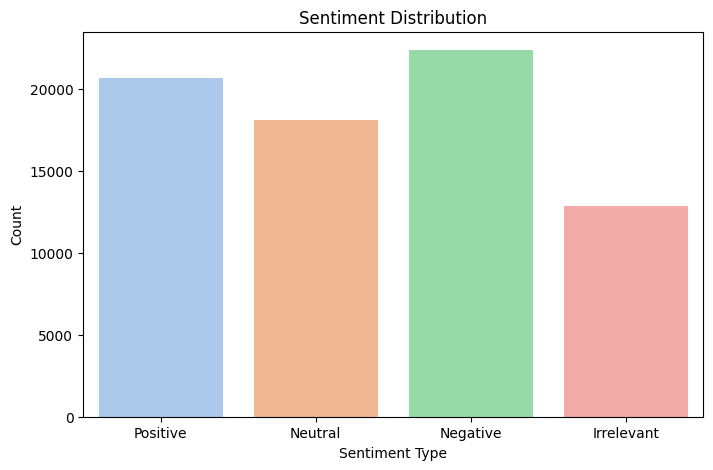

In [22]:
# Visualizing Sentiment Counts

plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

In [23]:
# Checking examples of Content of each Sentiment

print("Positive Example:\n", df[df['Sentiment'] == 'Positive'].iloc[0]['Content'])
print("\nNegative Example:\n", df[df['Sentiment'] == 'Negative'].iloc[0]['Content'])
print("\nNeutral Example:\n", df[df['Sentiment'] == 'Neutral'].iloc[0]['Content'])

Positive Example:
 I am coming to the borders and I will kill you all,

Negative Example:
 the biggest dissappoinment in my life came out a year ago fuck borderlands 3

Neutral Example:
 Rock-Hard La Varlope, RARE & POWERFUL, HANDSOME JACKPOT, Borderlands 3 (Xbox) dlvr.it/RMTrgF  


In [30]:
# Analyzing top 5 entities

top_entities = df['Entity'].value_counts().head(5).index
top_entities

Index(['LeagueOfLegends', 'MaddenNFL', 'CallOfDuty', 'Verizon',
       'TomClancysRainbowSix'],
      dtype='object', name='Entity')

In [36]:
filtered = df[df['Entity'].isin(top_entities)]
filtered.head(50)

,ID,Entity,Sentiment,Content
29992,7201,LeagueOfLegends,Neutral,Check out my video!
29993,7201,LeagueOfLegends,Neutral,Take a look at my video!
29994,7201,LeagueOfLegends,Neutral,Watch my video!
29995,7201,LeagueOfLegends,Neutral,Check out our video!
29996,7201,LeagueOfLegends,Neutral,Check for out my video!
29997,7201,LeagueOfLegends,Neutral,out out my video!
29998,7202,LeagueOfLegends,Negative,I play league of legends now...... Still bad tho
29999,7202,LeagueOfLegends,Negative,I'm playing League of Legends now...... Still bad
30000,7202,LeagueOfLegends,Negative,I'm playing in the Champions League now...... ...
30001,7202,LeagueOfLegends,Negative,I play league of legends now...... Still bad....


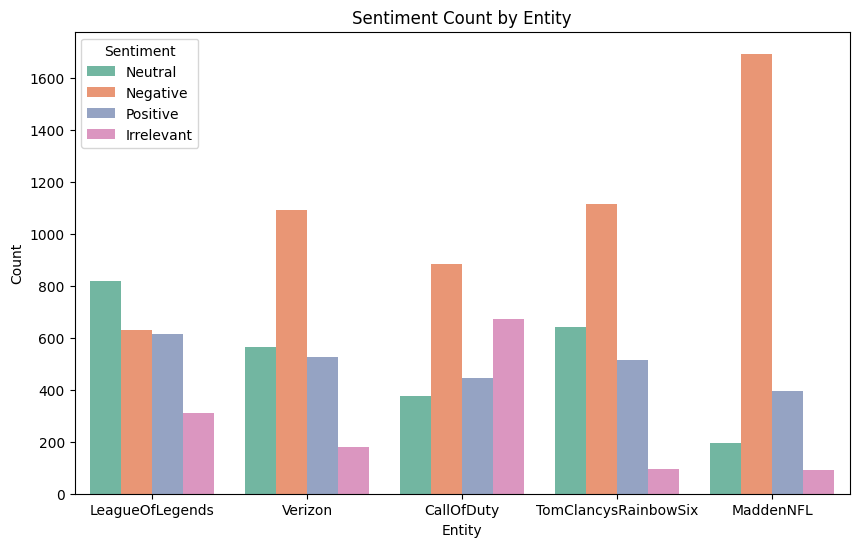

In [37]:
#  Visualizing Sentiment by Entity (Brand/Topic)

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, x='Entity', hue='Sentiment', palette='Set2')
plt.title("Sentiment Count by Entity")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.legend(title='Sentiment')
plt.show()

# Inference:

1.MaddenNFL has the highest number of Negative tweets among all entities.

2.LeagueOfLegends shows a balanced mix of sentiments, with high Neutral, Positive, and Negative counts.

3.Verizon and TomClancysRainbowSix have mostly Negative tweets compared to others.

4.CallOfDuty has a significant amount of Irrelevant tweets, more than others.